# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --no-warn-script-location --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Setting up Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading in the Food Hub dataset
path = pd.read_csv('/content/drive/MyDrive/foodhub_data/foodhub_order.csv')

foodhub_data = pd.DataFrame(path)

In [ ]:
#Viewing the first 5 rows of data
foodhub_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Viewing shape of data
foodhub_data.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
#Checking data types of the columns within the dataset
foodhub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking for missing values
foodhub_data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Statistical summary of the data
foodhub_data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
min_food_prep_time = foodhub_data['food_preparation_time'].min()

avg_food_prep_time = foodhub_data['food_preparation_time'].mean()

max_food_prep_time = foodhub_data['food_preparation_time'].max()

print('Minimum Food Prep Time is',min_food_prep_time,'mins \n','Average Food Prep Time is',avg_food_prep_time,'mins \n','Maximum Food Prep Time is',max_food_prep_time,'mins \n')

Minimum Food Prep Time is 20 mins 
 Average Food Prep Time is 27.371970495258168 mins 
 Maximum Food Prep Time is 35 mins 



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Number of unrated orders
foodhub_data[foodhub_data['rating']== 'Not given'].shape[0]

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#Customer_ID Observation

In [ ]:
#Evaluating if there are any repeat customers

#Storing repeat customers and non repeat customers in their own list
repeat_customers_list = []
non_repeat_customers_list = []

for customer in foodhub_data['customer_id']:
  repeat_customers = foodhub_data['customer_id'].value_counts() > 1
  repeat_customers_list.append(repeat_customers)
else:
  non_repeat_customers = foodhub_data['customer_id'].value_counts() == 1
  non_repeat_customers_list.append(non_repeat_customers)

# Displaying chart that showcases if any customer_ids were associated with

# multiple orders

foodhub_data['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


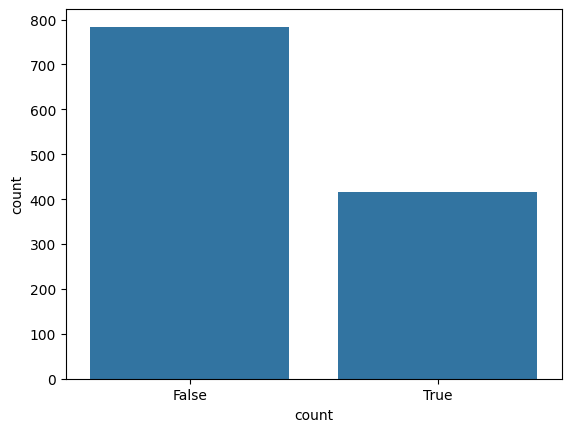

In [ ]:
#Graphing the count of repeat customers vs one time customers
sns.countplot(data=foodhub_data,x= foodhub_data['customer_id'].value_counts() > 1)
plt.show()

In [ ]:
#Percentage of customers that order more than once
#total customers
total_customers = foodhub_data['customer_id'].nunique()
repeat_customers = foodhub_data['customer_id'].value_counts()
num_repeat_customers = repeat_customers[repeat_customers > 1].count()

repeat_customers_percentage = (num_repeat_customers / total_customers) * 100


print('The percentage of repeat customers is',repeat_customers_percentage,'%')

The percentage of repeat customers is 34.66666666666667 %


#ORDER_ID OBSERVATION

In [ ]:
#Evaluating order id to understand how many distinct orders exist
unique_orders = foodhub_data['order_id'].nunique()

print('There are',unique_orders,'unique orders')


There are 1898 unique orders


#Day_of_the_week observation

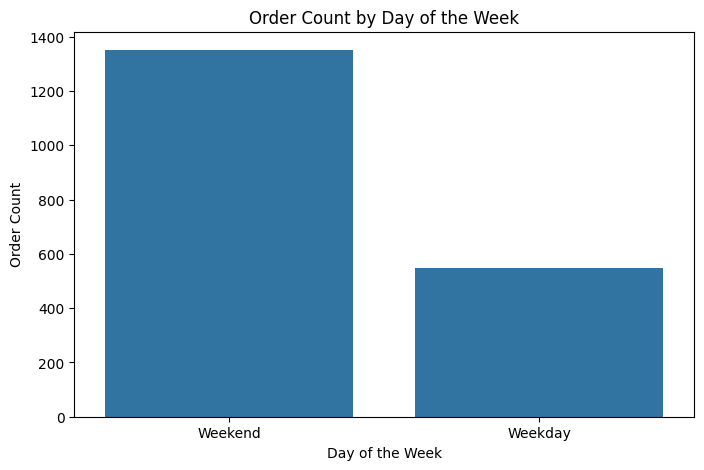

Weekend orders more than double weekday orders


In [ ]:
#Since all of the orders are unique, I'm going to visualize to show order counts based on the day of the week.
plt.figure(figsize=(8,5))
sns.countplot(data=foodhub_data,x='day_of_the_week')
#Adding Labels
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.title('Order Count by Day of the Week')
plt.show()


print('Weekend orders more than double weekday orders')

#Order_Cost Observation

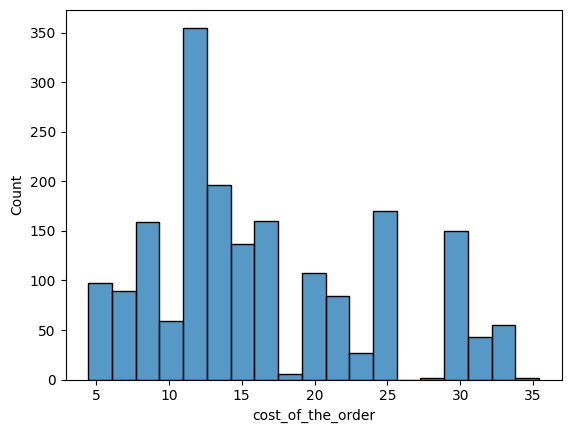

Slightly right skewed


In [ ]:
# Viewing Distribution of order cost
sns.histplot(data=foodhub_data,x='cost_of_the_order')
plt.show()

print('Slightly right skewed')

#Restaurant_Name Observation

In [ ]:
#Total Number of Restaurants in Dataset
total_restaurants = foodhub_data['restaurant_name'].nunique()

print('There are',total_restaurants,'restaurants in the dataset')

There are 178 restaurants in the dataset


In [ ]:
#Because there are a lot of restaurants, I'm seperating them by thirds based off of order counts.

restaurant_order_counts = foodhub_data['restaurant_name'].value_counts()
top_third_of_restaurants = restaurant_order_counts.head(59)

middle_third_of_restaurants = restaurant_order_counts[59:118]

bottom_third_of_restaurants = restaurant_order_counts[118:]

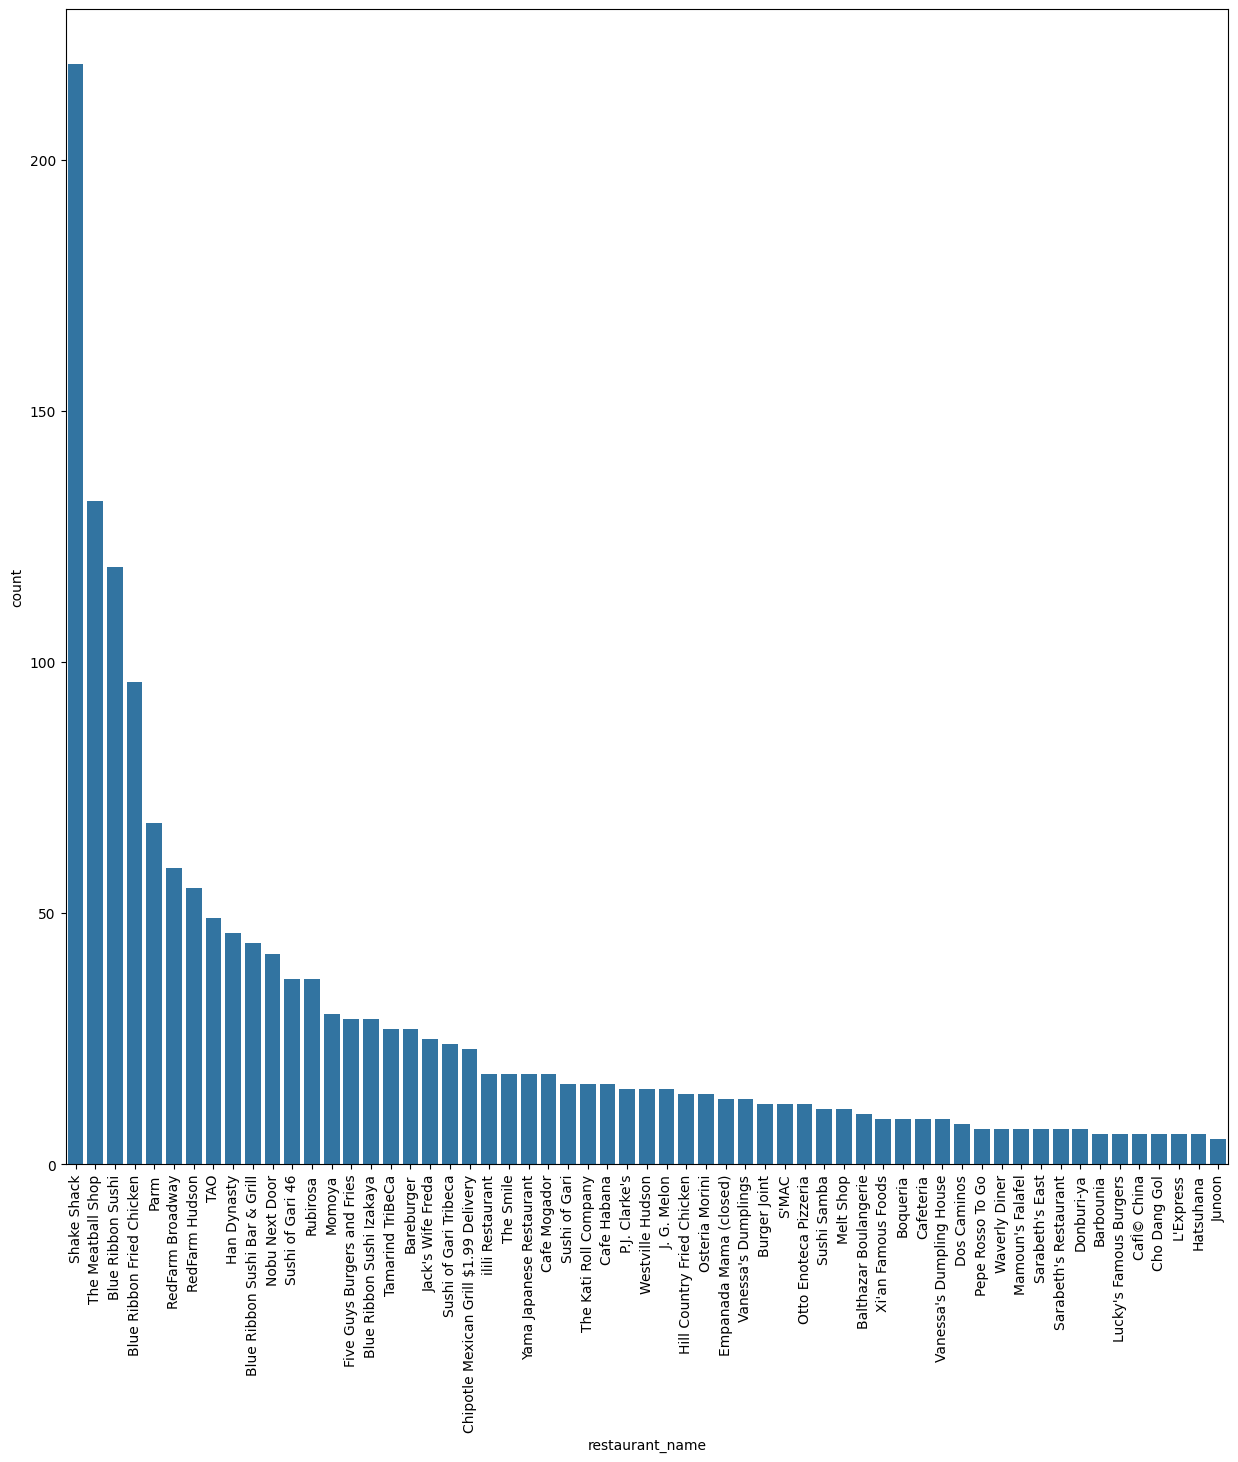

Top third of restaurants that have the highest number of orders


In [ ]:
#Graphing each third of restraunts


plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(data=foodhub_data,x='restaurant_name',order=top_third_of_restaurants.index)
plt.show()

print('Top third of restaurants that have the highest number of orders')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


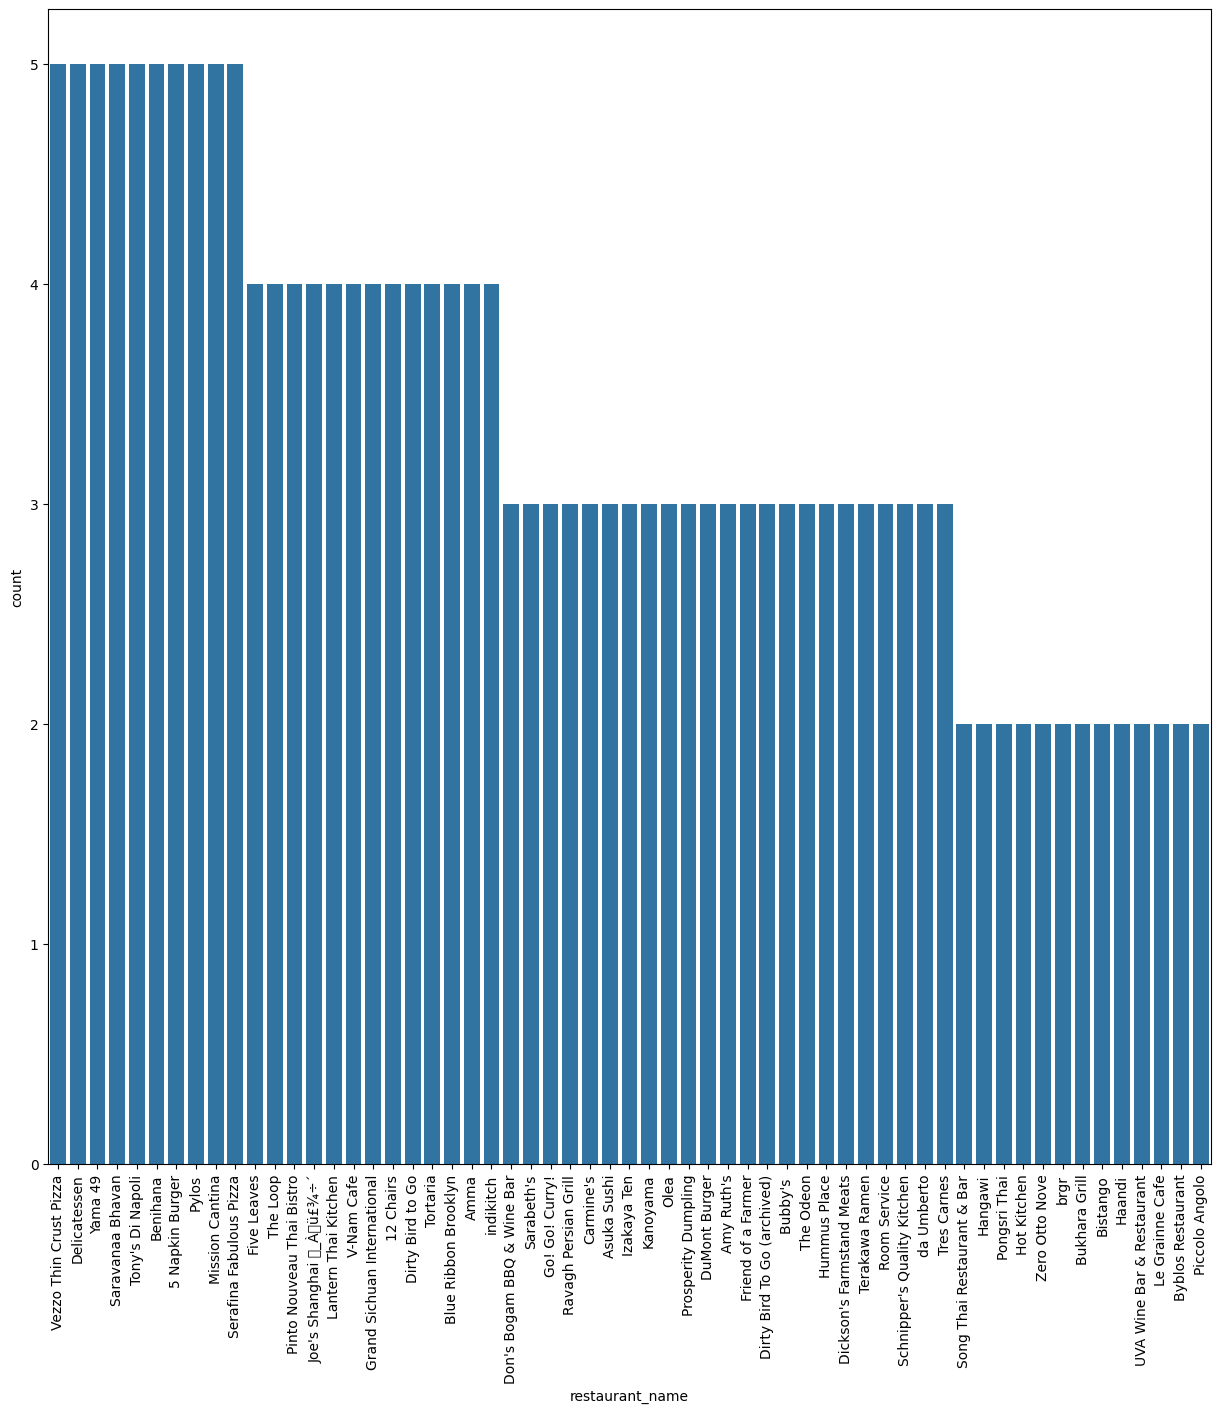

Middle third of restaurants that have the next highest number of orders


In [ ]:
#Middle Third of Restaurants
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(data=foodhub_data,x='restaurant_name', order = middle_third_of_restaurants.index)
plt.show()

print('Middle third of restaurants that have the next highest number of orders')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


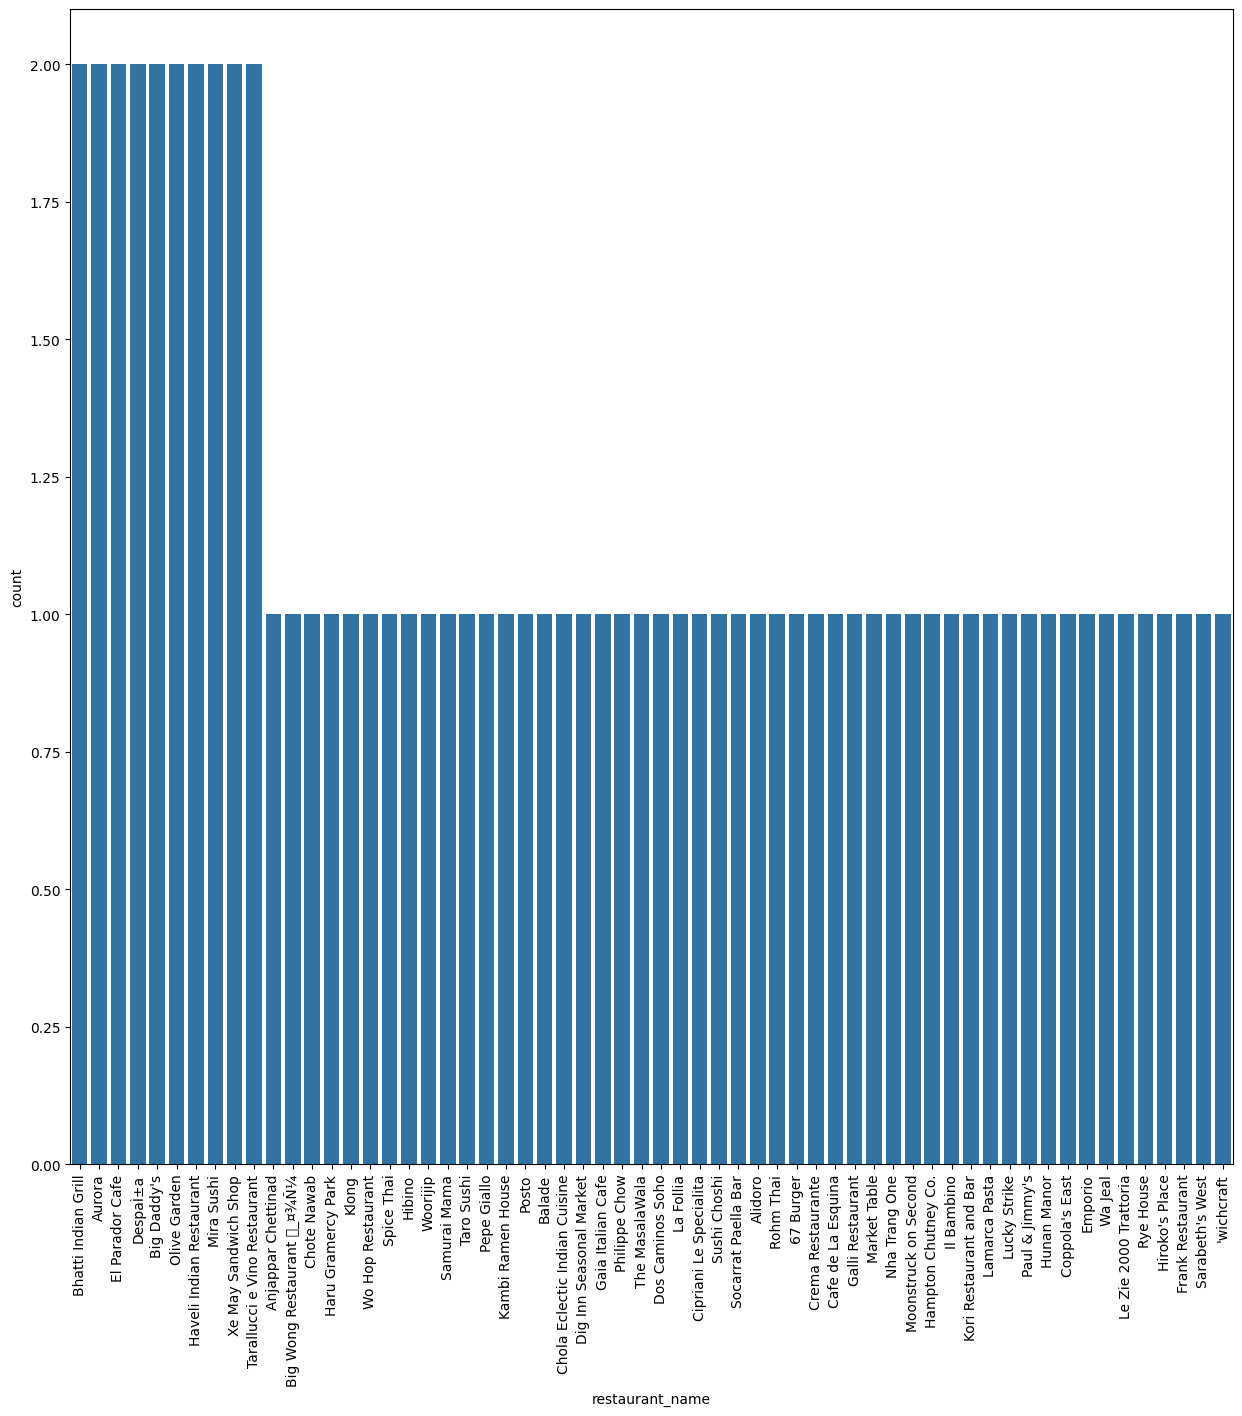

Bottom third of restaurants that have the least number of orders


In [ ]:
#Bottom third of restaurants
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(data=foodhub_data,x='restaurant_name', order = bottom_third_of_restaurants.index)
plt.show()

print('Bottom third of restaurants that have the least number of orders')

#Cuisine_type Observation

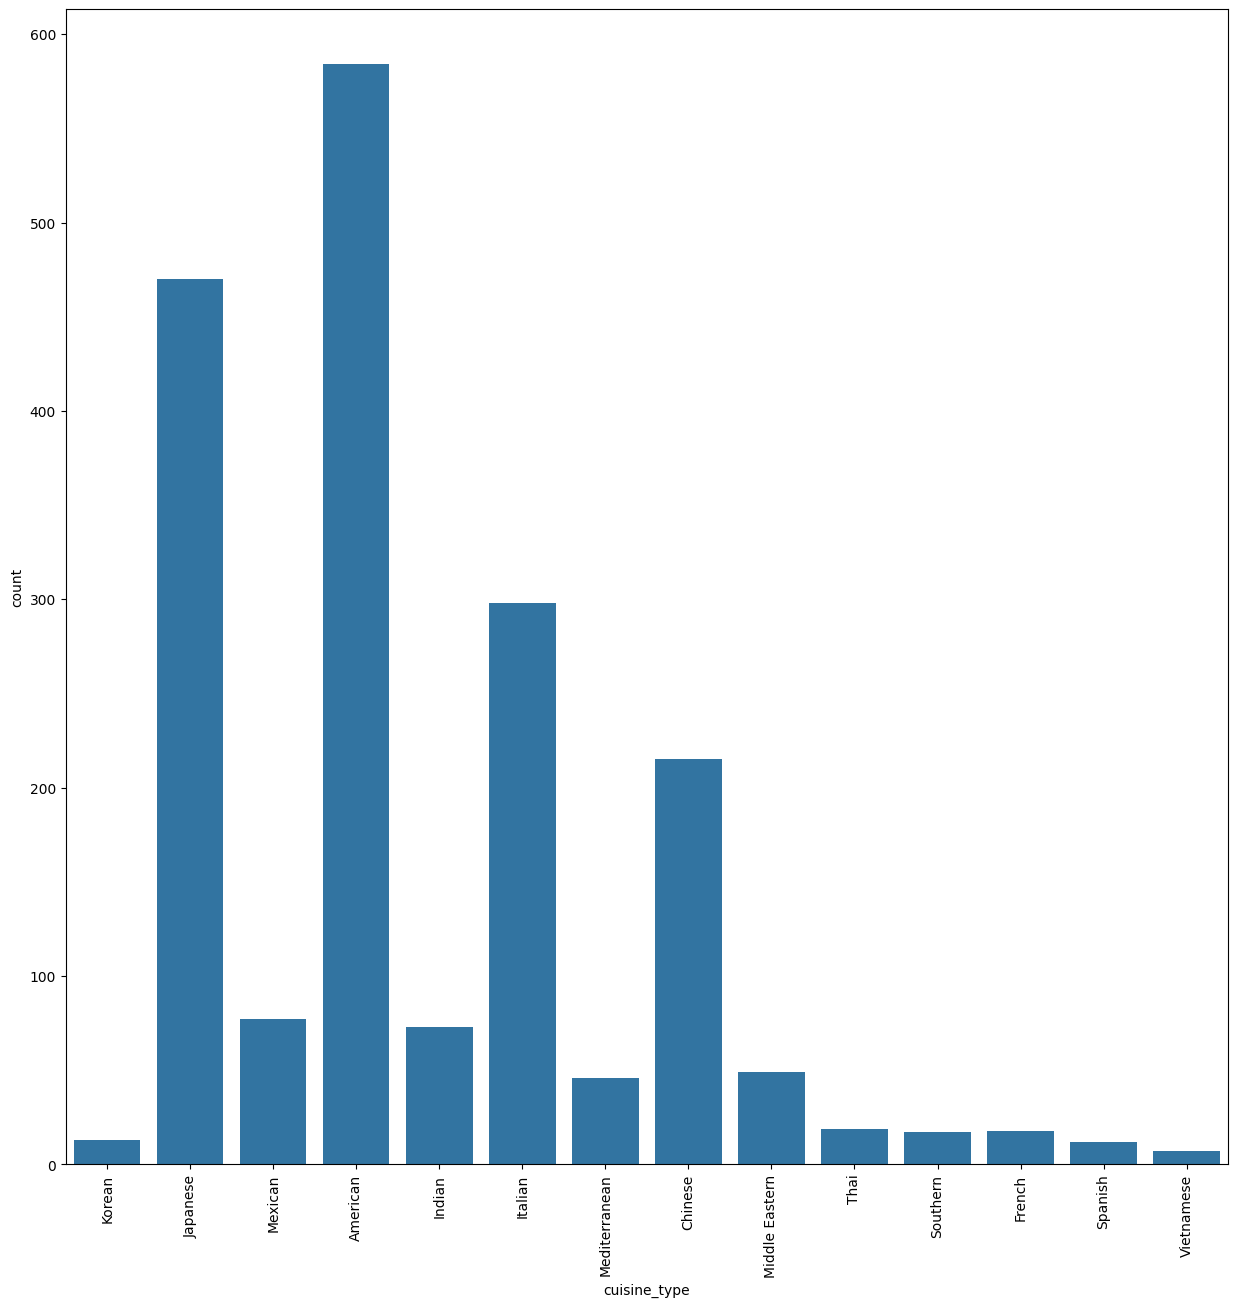

In [ ]:
#Visualizing the frequency of each cusisine type
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(data=foodhub_data,x='cuisine_type')
plt.show()

#Rating_Type Observation

In [ ]:
#Checking for each type of rating possible
foodhub_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

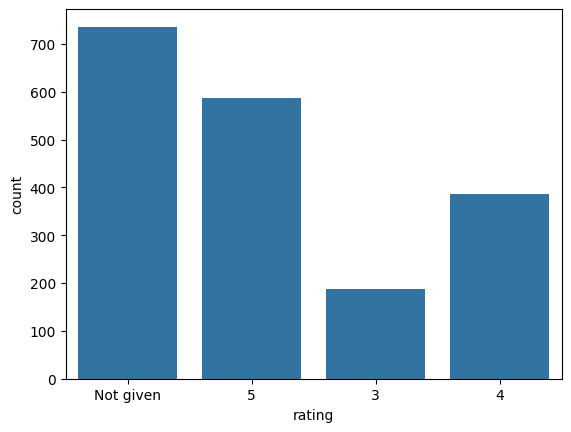

In [ ]:
#Frequency of each rating type
sns.countplot(data=foodhub_data,x='rating')
plt.show()

#Total_Preparation_Time observation

<ipython-input-75-7abd7a0bb241>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=foodhub_data[foodhub_data['restaurant_name'].isin(top_5_restaurants.index)],x='day_of_the_week',y='food_preparation_time',hue='restaurant_name', ci= False)


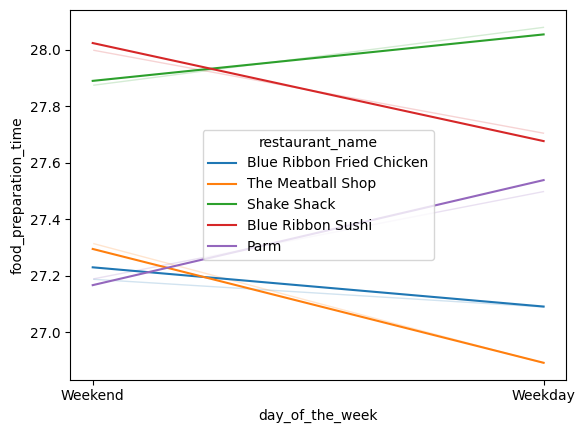

In [ ]:
#Viewing change in prep time for top 5 restaurants for weekdays vs weekends
top_5_restaurants = foodhub_data['restaurant_name'].value_counts().head(5)

sns.lineplot(data=foodhub_data[foodhub_data['restaurant_name'].isin(top_5_restaurants.index)],x='day_of_the_week',y='food_preparation_time',hue='restaurant_name', ci= False)
plt.show()



#Delivery_Time observation

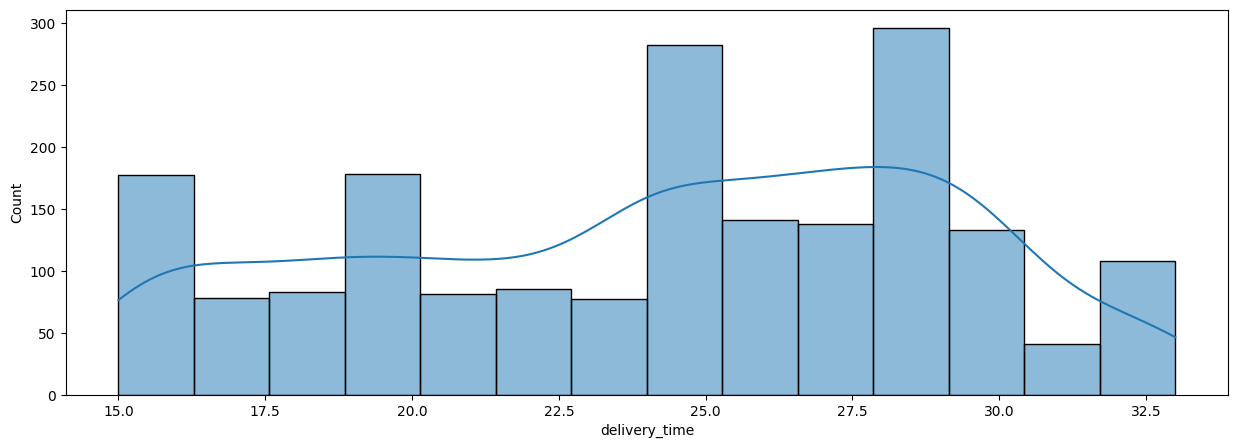

In [ ]:
#Distribution of Delivery_time values
plt.figure(figsize=(15,5))
sns.histplot(data=foodhub_data,x='delivery_time', kde=True)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 Restaurants based off of orders received
top_5= foodhub_data['restaurant_name'].value_counts().head(5)
top_5_list = foodhub_data['restaurant_name'].value_counts().head(5).index.tolist()
top_5_list
print('The Top 5 Restaurants are',top_5_list)

The Top 5 Restaurants are ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Most popular cuisine on weekends
cuisine_counts = foodhub_data[foodhub_data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()
#top_5_cuisine = cuisine_counts.head(5)
#top_5_cuisine
most_popular_cuisine = cuisine_counts.idxmax()
print('The most popular cuisine on weekends is',most_popular_cuisine)

The most popular cuisine on weekends is American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Percent of orders that cost more than 20 dollars
orders_greater_than_20 = foodhub_data[foodhub_data['cost_of_the_order'] > 20]
orders_greater_than_20_percentage = (len(orders_greater_than_20) / len(foodhub_data)) * 100
print('The percentage of orders that cost more than 20 dollars is',orders_greater_than_20_percentage,'%')

The percentage of orders that cost more than 20 dollars is 29.24130663856691 %


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#Avg order delivery time
avg_delivery_time = foodhub_data['delivery_time'].mean()
print('The average order delivery time is',avg_delivery_time,'minutes')

The average order delivery time is 24.161749209694417 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Top 3 customers with highest number of orders placed
top_3_customers = foodhub_data['customer_id'].value_counts().head(3)
top_3_customers_list = foodhub_data['customer_id'].value_counts().head(3).index.tolist()
print('The top 3 customers(customer_ids) with the highest number of orders placed are',top_3_customers_list)

The top 3 customers(customer_ids) with the highest number of orders placed are [52832, 47440, 83287]


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#number of different possible ratings
foodhub_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

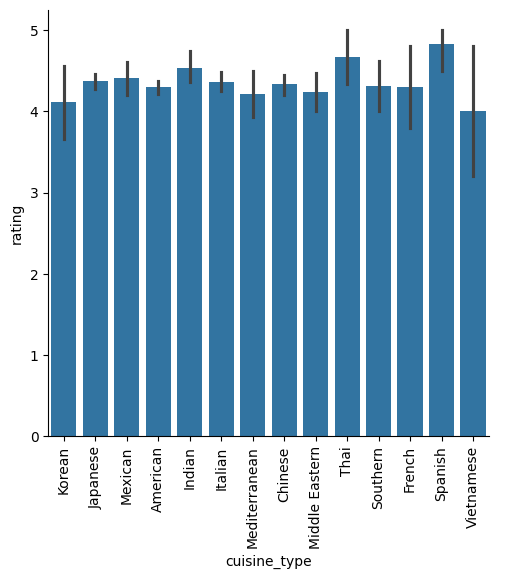

Spanish food has the highest average rating


,count
cuisine_type,
French,18
Southern,17
Korean,13
Spanish,12
Vietnamese,7


In [ ]:
#Plotting relationship between cuisine type and rating

foodhub_data_copy = foodhub_data.copy()
foodhub_data_copy['rating'] = foodhub_data_copy['rating'].replace('Not given', np.nan)
#foodhub_data_copy.head()
foodhub_data_copy['rating'] = pd.to_numeric(foodhub_data_copy['rating'], errors='coerce')

sns.catplot(data=foodhub_data_copy, x='cuisine_type',y='rating',kind='bar')
plt.xticks(rotation=90)
plt.show()
print('Spanish food has the highest average rating')

cuisine_counts = foodhub_data['cuisine_type'].value_counts()
cuisine_counts.tail()
#Spanish food has the second lowest order count so this skews the data a bit

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Japanese'),
  Text(1, 0, 'Mexican'),
  Text(2, 0, 'American'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Chinese')])

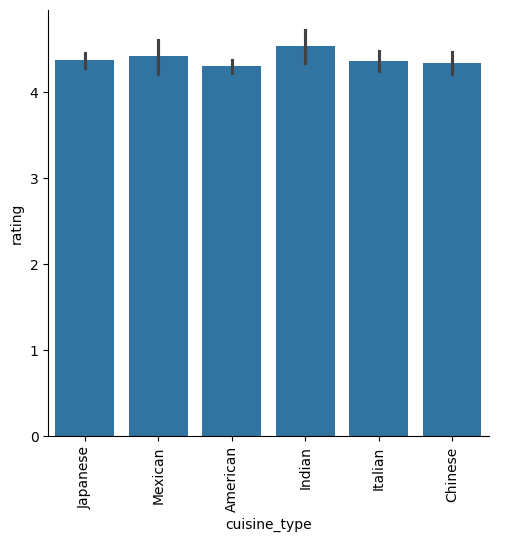

In [ ]:
#Plotting which cuisine has the highest average rating with at least 50 or more orders.
cuisine_counts_overall = foodhub_data['cuisine_type'].value_counts()
high_demand_cuisine_overall = cuisine_counts_overall[cuisine_counts_overall >= 50]

sns.catplot(data=foodhub_data_copy[foodhub_data_copy['cuisine_type'].isin(high_demand_cuisine_overall.index)], x='cuisine_type',y='rating',kind='bar')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Blue Ribbon Fried Chicken'),
  Text(1, 0, 'The Meatball Shop'),
  Text(2, 0, 'Shake Shack'),
  Text(3, 0, 'Blue Ribbon Sushi'),
  Text(4, 0, 'Parm')])

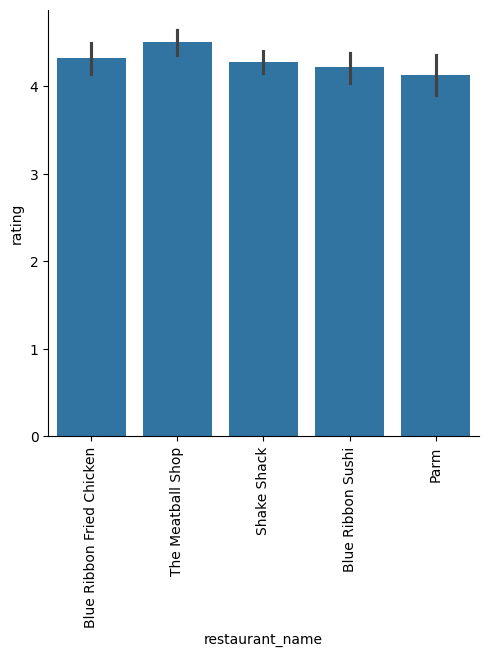

In [ ]:
#Plotting top 5 restaurants with best avg rating
top_5_restaurants = foodhub_data['restaurant_name'].value_counts().head(5)
top_5_restaurants

sns.catplot(data=foodhub_data_copy[foodhub_data_copy['restaurant_name'].isin(top_5_restaurants.index)], x='restaurant_name',y='rating',kind='bar')
plt.xticks(rotation=90)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Finding restraunts with more than 50 ratings and an average rating of 4

#Using dataset copy because rating column has been converted to numeric in that dataset

rating_counts_more_than_50 = foodhub_data_copy['restaurant_name'].value_counts()>=50
#rating_counts_more_than_50

avg_rating_greater_than_4 = foodhub_data_copy.groupby('restaurant_name')['rating'].mean()>=4
#avg_rating_greater_than_4

promotional_offer_restaurants= []

for restaurant in rating_counts_more_than_50.index:
  if rating_counts_more_than_50[restaurant] and avg_rating_greater_than_4[restaurant]:
    promotional_offer_restaurants.append(restaurant)

print('The restaurants that meet the criteria for the promotional offer are',promotional_offer_restaurants)



The restaurants that meet the criteria for the promotional offer are ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson']


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
Net_revenune = foodhub_data['cost_of_the_order'].apply(lambda x: x * 0.25 if x > 20 else (x * 0.15 if x > 5 else 0)).sum()
print('The net revenue generated by the company across all orders is',Net_revenune)

The net revenue generated by the company across all orders is 6166.303


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Percentage of orders that take more than 60 mins to prep and then deliver.
orders_greater_than_60 = foodhub_data[foodhub_data['delivery_time'] + foodhub_data['food_preparation_time'] > 60]
orders_greater_than_60

orders_greater_than_60_percentage = (len(orders_greater_than_60) / len(foodhub_data)) * 100
print('The percentage of orders that take more than 60 mins to prep and then deliver is',orders_greater_than_60_percentage,'%')

The percentage of orders that take more than 60 mins to prep and then deliver is 10.537407797681771 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Mean time to deliver on weekdays
mean_delivery_time_weekday = foodhub_data[foodhub_data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

#Mean time to deliver on weekends
mean_delivery_time_weekend = foodhub_data[foodhub_data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()


print('The mean delivery time on weekdays is',mean_delivery_time_weekday)
print('The mean delivery time on weekends is',mean_delivery_time_weekend)

The mean delivery time on weekdays is 28.340036563071298
The mean delivery time on weekends is 22.4700222057735


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Demand is much higher during the weekend than on weekdays
* There's only a small number of restraunts that meet the requested promotional offer threshold (50 plus ratings greater than 4 stars)
* American cuisine is the most popular cuisine type followed by Japanese and Italian.
* The Meatball shop has the highest average rating.
* There are much more one time customers than repeat customers.

### Recommendations:

*  Offer promotions during the week to balance out demand
* Promote underperforming restaurants with more ads and visibility, and offer discounts to these restaurants.
* Prioritze adding new restaurants offering high-demand cuisines (American, Japanese,Italian, etc.)
* Highlight top-rated restaurants and cuisine types in the app to attract more orders.
* Offer rewards for customers who make frequent orders.


---